# ENTREGABLE GRUPO 16
# INTEGRANTES: 
# Fernanda Borghello, Rodrigo Ruiz, Alfonsina Szpeiner

# Laboratorio 1: Regresión en Boston

# Importamos las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston['data']           # matriz con los datos de entrada (atributos)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston['target']         # vector de valores a predecir

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [8]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

<font color='Medium BLUE'><strong>
1) El conjunto de datos reune valores para 14 atributos de propiedades citas en la ciudad de Boston que estarían relacionadas con el valor/precio de la propiedad. Estos atributos estan principalmente centrados en las caracteristicas del entorno/vecindario en el que estan estas propiedades.

<font color='Medium RED'><strong>
2) La variable objetivo a predecir es la denominada "MEDV" o "Median value of owner-occupied homes in $1000' que es el precio de las viviendas ocupadas por sus dueños en miles.

<font color='Medium BLUE'><strong>
3) Las 13 variables/atributos que estan disponibles para realizar la prediccion son:

CRIM: tasa per capita de crimenes en la ciudad<br>
ZN: proporción de zonas con terrenos residenciales con lotes mayores a 25000 pies cuadrados<br>
INDUS: proporción de acres con negocios no minoristas en la ciudad / proporción de sectores "industriales"<br>
CHAS: cercano o no al río Charles (variable dummy)<br>
NOX: concentración de oxidos nítricos (partes por cada 10 millones)<br>
RM: promedio de habitaciones por vivienda<br>
AGE: proporción de unidades ocupadas por dueños que fueron contruidas antes de 1940<br>
DIS: distancias ponderadas a los 5 centros de empleo de Boston<br>
RAD: índice de accesibilidad a carreteras/rutas/autopistas radiales<br>
TAX: valor total de los impuestos a la propiedad por $10 mil<br>
PTRATIO: proporción alumno/docente en la ciudad<br>
B: proporción de personas negras en la ciudad<br>
LSTAT: porcentaje de la población de menor estatus

<font color='Medium red'><strong>
4) Simplemente por su nominación, creeriamos que RM, DIS, RAD, CRIM serían las variables mas relacionadas con el precio.

<font color='Medium BLUE'><strong>
5) En el conjunto de datos existe una variable muy relacionada a un prejuicio que entendemos presentan un dilema ètico para ser tomada como variable asociada al precio de una propiedad. Esta variables es B y considera la proporción de personas negras en el área.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, hacemos una gráfica que muestre su relación con la variable objetivo.
2. Estudiamos las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. ¿cuáles son esos atributos? Los lístamos en orden de importancia.

In [9]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<font color='Medium red'><strong>
Se analiza la distribución de la variable objetivo (MEDV= Home median values o Precio promedio de las viviendas en miles) mediante un histograma



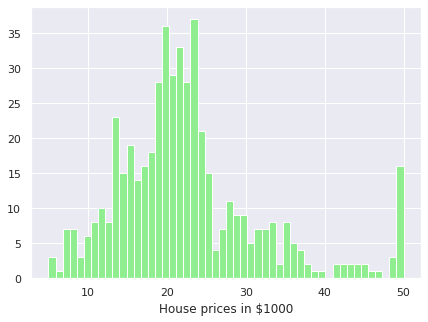

In [10]:
sns.set(rc={'figure.figsize':(7,5)})
plt.hist(df['MEDV'],color ="lightgreen", bins=50)
plt.xlabel("House prices in $1000")
plt.show()

<font color='Medium red'><strong>
1) Realizamos las graficas para cada una de las 13 variables disponibles para la predicción del precio

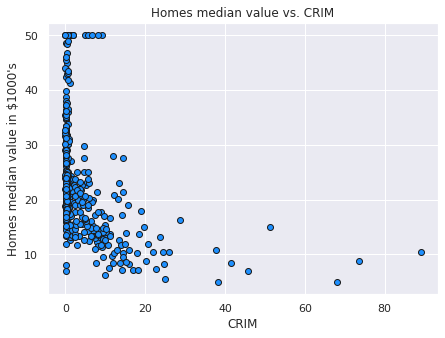

In [11]:
#tasa per capita de crimenes en la ciudad
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

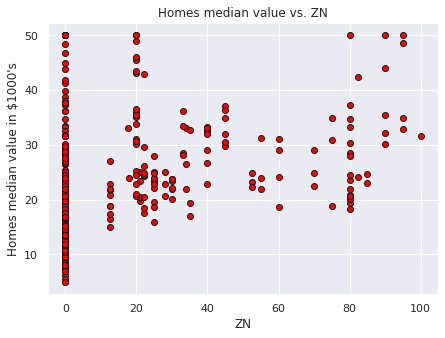

In [12]:
#proporción de zonas con terrenos residenciales con lotes mayores a 25000 pies cuadrados
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="red", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

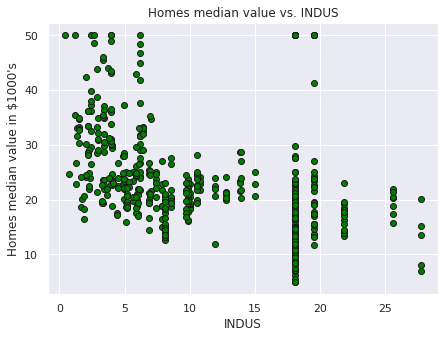

In [13]:
#proporción de acres con negocios no minoristas en la ciudad / proporción de sectores "industriales"
feature = 'INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="green", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

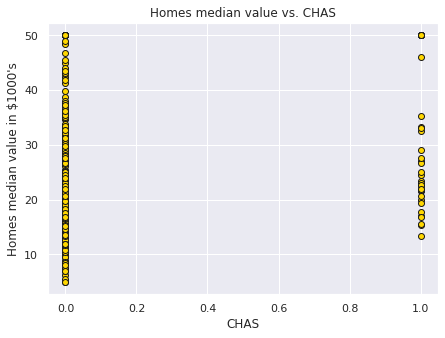

In [14]:
#cercano o no al río Charles
feature = 'CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="gold", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

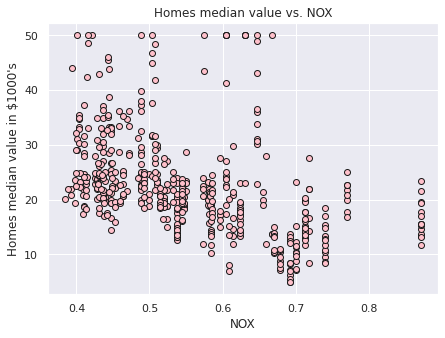

In [15]:
#concentración de oxidos nítricos (partes por cada 10 millones)
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="pink", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

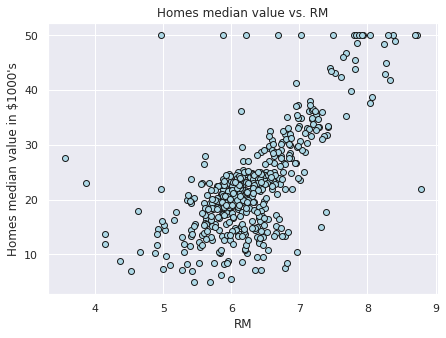

In [16]:
#promedio de habitaciones por vivienda
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="lightblue", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

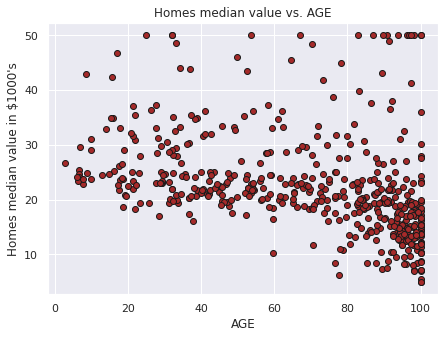

In [17]:
#proporción de unidades ocupadas por dueños que fueron contruidas antes de 1940
feature = 'AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="brown", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

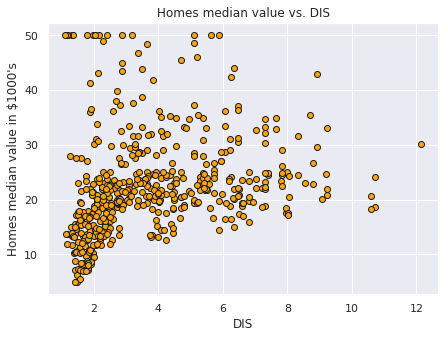

In [18]:
#distancias ponderadas a los 5 centros de empleo de Boston
feature = 'DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="orange", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

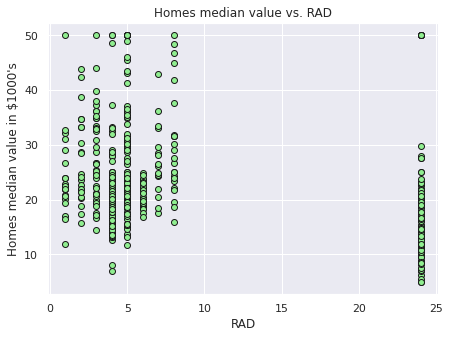

In [19]:
#índice de accesibilidad a carreteras/rutas/autopistas radiales
feature = 'RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="lightgreen", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

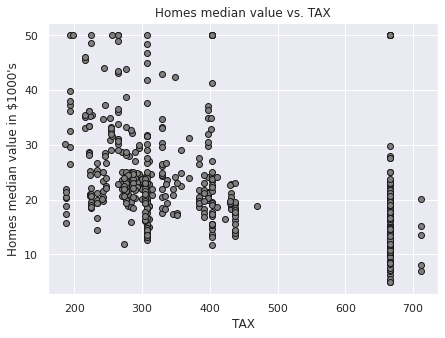

In [20]:
#valor total de los impuestos a la propiedad por $10 mil
feature = 'TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="grey", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

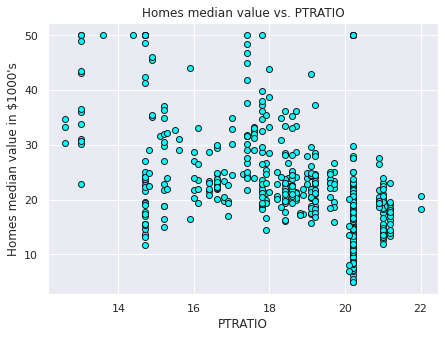

In [21]:
#proporción alumno/docente en la ciudad
feature = 'PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="aqua", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

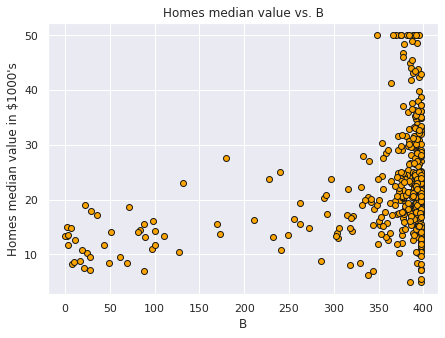

In [22]:
#proporción de personas negras en la ciudad
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="orange", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

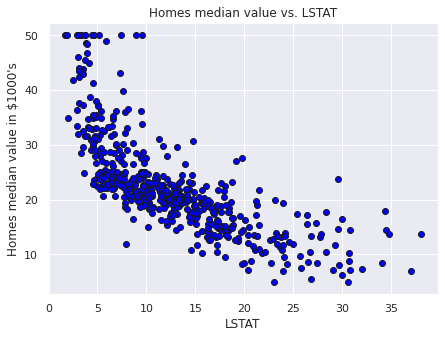

In [23]:
#porcentaje de la población de menor estatus
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="blue", edgecolor="k", label="datos")
plt.title("Homes median value vs. " + feature)
plt.xlabel(feature)
plt.ylabel("Homes median value in $1000's")
plt.show()

<font color='Medium red'><strong>
2) A "ojo" las variables mas informativos para la predicción serían: RM, LSTAT y PTRATION

<font color='Medium blue'><strong>
3) En orden de importancia, estos atributos que podrían ser mas relevantes para la predicción serían:

PRIMER LUGAR)  RM: Promedio de habitaciones por vivienda. Claramente a medida aumenta el promedio de habitaciones, aumenta el precio.

SEGUNDO LUGAR) LSTAT: porcentaje de la poblacion de menor estatus. Aún cuando es una variable controvertida, los datos muestran que los precios disminuyen a mayor propocion de la poblacion de menor estatus.

TERCER LUGAR) PTRATION: Proporción alumno/docente en la ciudad. Aparentemente, en el grafico se observaría que a mayor proporcion de alumnos por docente, el precio de la vivienda sería menor.


In [24]:
#CONFIRMAMOS LO OBSERVADO A TRAVES DE ANALISIS DE CORRELACIONES
corr = df.corrwith(df.MEDV).round(2).abs().sort_values(ascending=False)
corr

MEDV       1.00
LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
RAD        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
dtype: float64

## Ejercicio 3: Regresión Lineal
<font color='MediumBlue'><strong>
1. Seleccionamos **un solo atributo** que consideramos como el más apropiado.
2. Instanciamos una regresión lineal de **scikit-learn**, y la entrenamos usando sólo el atributo seleccionado.
3. Evaluamos, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Graficamos el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interpretamos el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [25]:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [26]:
X_train_f[:5]

array([[6.951],
       [5.961],
       [6.897],
       [6.012],
       [5.304]])

In [27]:
X_train_f=np.resize(X_train_f,(404,))
X_test_f=np.resize(X_test_f,(102,))

In [28]:
X_train_f.shape, X_test_f.shape

((404,), (102,))

In [29]:
X_train_f[:20]

array([6.951, 5.961, 6.897, 6.012, 5.304, 4.963, 6.12 , 6.495, 6.943,
       5.617, 6.172, 5.872, 5.631, 6.064, 5.935, 6.372, 5.036, 7.923,
       6.739, 5.52 ])

In [30]:
X_train_f.shape

(404,)

In [31]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape), X_train_f), axis=1)  # add bias
X_train_f_bias[:5]

array([[1.   , 6.951],
       [1.   , 5.961],
       [1.   , 6.897],
       [1.   , 6.012],
       [1.   , 5.304]])

In [32]:
X_train_f_bias.shape

(404, 2)

In [33]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [34]:
X_train_f[:20], y_train[:20]

(array([6.951, 5.961, 6.897, 6.012, 5.304, 4.963, 6.12 , 6.495, 6.943,
        5.617, 6.172, 5.872, 5.631, 6.064, 5.935, 6.372, 5.036, 7.923,
        6.739, 5.52 ]),
 array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
        20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3]))

In [35]:
w = linear_least_squares(X_train_f, y_train)

In [36]:
w #Dimensiones de w

array([  9.37638431, -36.47618963])

In [37]:
# Predecimos y evaluamos
from sklearn.metrics import mean_squared_error

y_train_pred = f(X_train_f, w)
y_test_pred = f(X_test_f, w)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


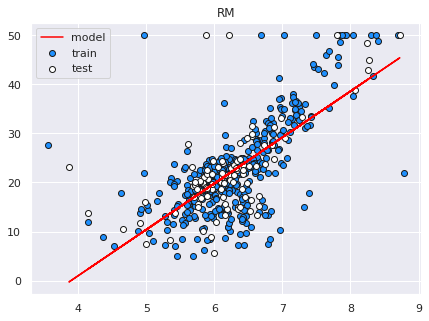

In [38]:
# Graficamos
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
#plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X_test_f, f(X_test_f, w), color="red", label="model")
plt.title(feature)
plt.legend()
plt.show()

<font color='MediumBlue'><strong>
Observando el grafico obtenido anteriormente y el error cuadratico medio obtenido (+40%), podemos deducir que el modelo no es muy preciso.<br>
Pero, para analizar la capacidad predictiva de RM sería necesario evaluar bajo regresión lineal otros atributos y comparar los valores absolutos obtenidos del error.

## Ejercicio 4: Regresión Polinomial
<font color='MediumBlue'><strong>
En este ejercicio entrenamos regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Usamos **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, hicimos lo siguiente:
    1. Instanciamos y entrenamos una regresión polinomial.
    2. Predecimos y calculamos el error en el entrenamiento y la evaluación. Imprimimos los valores.
    3. Guardamos los errores en una lista.
2. Graficamos las curvas de error en términos del grado del polinomio.
3. Interpretamos la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccionamos el modelo que mejor funciona, y graficamos el modelo conjuntamente con los puntos.
5. Interpretamos el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

<font color='MediumBlue'><strong>
****ENTRENAMOS POLINOMIO GRADO 3****

In [39]:
X_train_f.shape, X_test_f.shape

((404,), (102,))

In [40]:
#Se convierte cada dato en un vector de una dimensión:
X_train_p = X_train_f.reshape(-1, 1)
X_test_p = X_test_f.reshape(-1, 1)
X_train_p.shape, X_test_p.shape

((404, 1), (102, 1))

<font color='MediumBlue'><strong>
*****GENERAMOS CARACTERISTICAS POLINOMIALES GRADO 3*****

In [41]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)  # polinomio de grado 3
pf.fit(X_train_p)         

PolynomialFeatures(degree=3)

In [42]:
X_train_p3 = pf.transform(X_train_p)

In [43]:
X_train_p3.shape

(404, 4)

In [44]:
X_train_p[0]

array([6.951])

In [45]:
X_train_p3[0]

array([  1.        ,   6.951     ,  48.316401  , 335.84730335])

<font color='MediumBlue'><strong>
**1° INSTANCIAMOS Y ENTRENAMOS**



In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3   #Modelo de grado 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) 
model = make_pipeline(pf, lr)


In [47]:
model.fit(X_train_p, y_train)
# ATENTI, aca si usas X_train_p te da 4 coeficientes..si usas p2 te da 16 coef..DUDA, para que en la clase hicimos los pasos previos y calculamos una p2 que no debemos usar?

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [48]:
Z_train = pf.fit_transform(X_train_p, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

In [49]:
lr.coef_

array([ 274.12931892, -124.87102604,   18.86964785,   -0.85958803])

In [50]:
lr.intercept_

0.0

In [51]:
X_train_p3.shape

(404, 4)

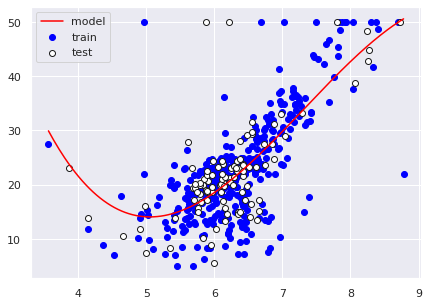

In [52]:
plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
plt.legend()
plt.show()

<font color='MediumBlue'><strong>
*****GENERAMOS CARACTERISTICAS POLINOMIALES GRADO 5*****

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 5
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) 
model = make_pipeline(pf, lr)

In [54]:
model.fit(X_train_p, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [55]:
lr.coef_

array([ 3.26542764e+03, -2.88383689e+03,  1.00946591e+03, -1.74370544e+02,
        1.48564244e+01, -4.98254327e-01])

In [56]:
lr.intercept_

0.0

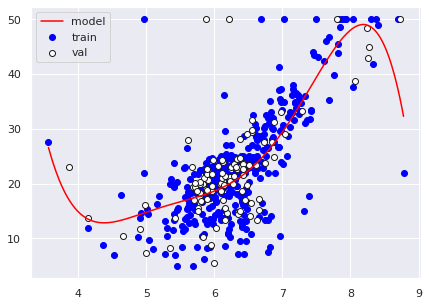

In [57]:
plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="val")
plt.legend()
plt.show()

In [58]:
X_train_f.shape, X_test_f.shape

((404,), (102,))

In [59]:
#Se convierte cada dato en un vector de una dimensión:
X_train_p = X_train_f.reshape(-1, 1)
X_test_p = X_test_f.reshape(-1, 1)

# 1.  polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # Entrenar:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_p, y_train) 
    
    # Predecir:
    y_train_pred = model.predict(X_train_p) 
    y_test_pred = model.predict(X_test_p) 
    
    # Evaluar:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [60]:
train_errors, test_errors

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913214,
  33.131121571949116,
  33.13011641557084,
  33.06035876459896,
  33.06035722589541,
  32.8548843047318],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925676028065,
  41.038288578720795,
  41.0091769653148,
  42.394110713112596,
  42.39922618997137,
  46.039030275360616])

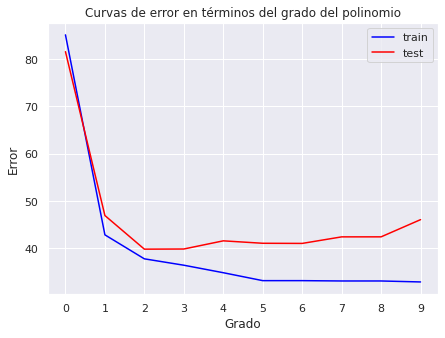

In [61]:
# 2. Graficamos curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.title("Curvas de error en términos del grado del polinomio")
plt.xlabel("Grado")
plt.xticks(degrees)
plt.ylabel("Error")
plt.show()

**Se puede ver que el <B><FONT COLOR="blue">error en entrenamiento </FONT> siempre baja, pero a partir del grado 3 comienza el sobreajuste, ya que el <B><FONT COLOR="red">error en evaluación </FONT>empieza a subir.**

**Ademas, se puede detectar claramente que el modelo que mejor ajusta los datos es el de grado 2**.

In [62]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_p, y_train);

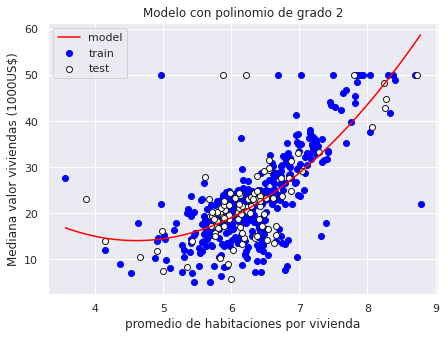

In [63]:
plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.title("Modelo con polinomio de grado 2")
plt.xlabel('promedio de habitaciones por vivienda')
plt.ylabel('Mediana valor viviendas (1000US$)')
plt.legend()
plt.show()

In [64]:
train_errors[3], test_errors[3]

(36.395658757671086, 39.82576208821606)

<font color='MediumBlue'><strong>
**Como se puede apreciar, para un GDL = 2 se obtiene el menor Error Cuadratico Medio**

### Selector interactivo del grado de las polynomial features

In [65]:
from ipywidgets import interact, widgets

In [66]:
def model_deg(grado):
    #reshape
    X_train_p = X_train_f.reshape(-1, 1)
    X_test_p = X_test_f.reshape(-1, 1)
    #model pipeline and error calc
    model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    model.fit(X_train_p, y_train)
    y_train_pred = model.predict(X_train_p) 
    y_test_pred = model.predict(X_test_p) 
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    #plot and print
    plt.scatter(X_train_p, y_train, color="blue", label="train")
    plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
    plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
    plt.xlabel('promedio de habitaciones por vivienda')
    plt.ylabel('Mediana valor viviendas (1000US$)')
    plt.xlim(3,9)
    plt.ylim(0,55)
    plt.legend()
    plt.show()
    print(f'\nTrain error: \t{train_error:0.3f}\nTest error: \t{test_error:0.3f}')

In [67]:
print('Seleccionar el grado de las características:')
interact(model_deg, grado=widgets.IntSlider(2,1,7,1));

Seleccionar el grado de las características:


interactive(children=(IntSlider(value=2, description='grado', max=7, min=1), Output()), _dom_classes=('widget-…

## Ejercicio 5: Regresión con más de un Atributo
<font color='MediumBlue'><strong>
En este ejercicio entrenamos regresiones que toman más de un atributo de entrada.

1. Seleccionamos **dos atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repetimos el ejercicio anterior, pero usando los atributos seleccionados sin graficar el modelo final.
3. Interpretamos el resultado y comparamos con los ejercicios anteriores. Justificamos.

In [68]:
# 1. Seleccionamos los atributos RM y LSTAT:
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [69]:
y_train.shape, y_test.shape

((404,), (102,))

In [70]:
# 2. Resolvemos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4] #Sacamos el 0 porque me da error, y acortamos para optimizar tiempos
for degree in degrees:
    # Entrenamos:
    pf = PolynomialFeatures(degree)
    poly_x_train_fs = pf.fit_transform(X_train_fs) 
    # fit_transform estandariza los datos
    poly_x_test_fs = pf.transform(X_test_fs)
    # transform() tambien escala los datos pero evita que sean usados para ajustar el modelo.
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(poly_x_train_fs, y_train)
    
    # Predecimos:
    y_train_pred = model.predict(poly_x_train_fs)
    y_test_pred = model.predict(poly_x_test_fs)
    
    # Evaluamos:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)


In [71]:
print('Degree\tTrain error\tTest error')
for degree in degrees:
    print(f'{degree}\t{train_errors[degree-1].round(2)}\t\t{test_errors[degree-1].round(2)}')

Degree	Train error	Test error
1	28.79		37.38
2	14.19		34.0
3	11.63		2308.24
4	22.54		33600166.6


<font color='MediumBlue'><strong>
Según pudimos observar, cuando entrenamos el modelo de regresión con dos atributos, el polinomio que mejor ajusta sigue siendo el de grado 2. Sin embargo, si comparamos este ejercicio con el ejercicio anterior la regresiòn con dos atributos tiene un menor error cuadrático que la regresiòn con un sólo atributo ya sea tanto con el set de entrenamiento como con el de evaluación. Esto seguramente es asì porque la variable a predecir ( valor promedio de las propiedades en miles) es multicausal y puede ser de este modo mejor predicha por varias variables dependientes (o "causas") que por una sola.